In [ ]:
import pandas as pd
benign_df = pd.read_csv("benign_domain_list.csv", header=None)
malicious_df = pd.read_csv("Malicious_URLs.csv")
mixed_df = pd.read_csv("mixed_domain_list.csv", header=None)
tranco_df = pd.read_csv("tranco_full_list_for_ranking.csv", header=None)
tld_scores_df = pd.read_csv('Spamhaus-tlds.csv')

In [ ]:
benign_df

In [ ]:
malicious_df

In [ ]:
mixed_df

In [ ]:
tranco_df

In [ ]:
# Block for installs
%pip install dnstwist
%pip install newspaper3k
%pip install requests
%pip install beautifulsoup4

In [ ]:
### Defining methods block
from urllib.parse import urlparse
import tldextract
import dnstwist
from newspaper import Article, Config
import newspaper
import requests
from bs4 import BeautifulSoup

def calculate_percentage_digits(domain):
    digits_count = sum(c.isdigit() for c in domain)
    total_chars = len(domain)
    percentage_digits = digits_count / total_chars * 100
    return percentage_digits

def get_fqdn(url):
    parsed_url = urlparse(url)
    return parsed_url.netloc

def count_unique_chars(domain):
    unique_chars = set(domain)
    return len(unique_chars) - 1     ### -1 because it counts the '.' in the FQDN

def count_hyphens(domain):
    hyphens_count = sum(c == '-' for c in domain)
    return hyphens_count

def count_dots(domain):
    dot_count = sum(c == '.' for c in domain)
    return dot_count

def get_tld(domain):
    ext = tldextract.extract(domain)
    return ext.suffix

def dnstwist_results(domain):
    results = dnstwist.Fuzzer(domain)
    return results.generate()

def generate_potential_typosquatting_domains(domain):
    fuzzer = dnstwist.Fuzzer(domain)
    variations = fuzzer.generate(max_changes=2, max_additions=2, max_deletions=2)
    if variations is not None:
        return set(variation.domain for variation in variations)
    else:
        return set()

In [ ]:
tranco_df['Domain'] = tranco_df[1]
tranco_df

In [ ]:
benign_df['Domain'] = benign_df[0]
benign_df['Domain Length'] = benign_df[0].str.len()
benign_df['Digit Percentage'] = benign_df[0].apply(calculate_percentage_digits)
benign_df['Unique Character Count'] = benign_df[0].apply(count_unique_chars)
benign_df['Hypen Count'] = benign_df[0].apply(count_hyphens)
benign_df['Dot Count'] = benign_df[0].apply(count_dots)
benign_df['TLD'] = benign_df[0].apply(get_tld)
#benign_df['DNSTwist Results'] = benign_df[0].apply(dnstwist_results)
merged_benign_tldscores_df = pd.merge(benign_df, tld_scores_df, on='TLD', how='left')
benign_df['TLD Reputation Score'] = merged_benign_tldscores_df['score']
benign_df['Tranco Rank'] = benign_df['Domain'].map(tranco_df.set_index('Domain')[0])
benign_df

In [ ]:
malicious_df['Domain'] = malicious_df['url'].apply(get_fqdn)
malicious_df['Domain Length'] = malicious_df['Domain'].str.len()
malicious_df['Digit Percentage'] = malicious_df['Domain'].apply(calculate_percentage_digits)
malicious_df['Unique Character Count'] = malicious_df['Domain'].apply(count_unique_chars)
malicious_df['Hyphen Count'] = malicious_df['Domain'].apply(count_hyphens)
malicious_df['Dot Count'] = malicious_df['Domain'].apply(count_dots)
malicious_df['Tranco Rank'] = malicious_df['Domain'].map(tranco_df.set_index('Domain')[0]) #not working correctly
malicious_df['TLD'] = malicious_df['Domain'].apply(get_tld)
merged_mal_tldscores_df = pd.merge(malicious_df, tld_scores_df, on='TLD', how='left')
malicious_df['TLD Reputation Score'] = merged_mal_tldscores_df['score']
malicious_df

In [20]:

mixed_df['Domain'] = mixed_df[0]
mixed_df['Domain Length'] = mixed_df[0].str.len()
mixed_df['Digit Percentage'] = mixed_df[0].apply(calculate_percentage_digits)
mixed_df['Unique Character Count'] = mixed_df[0].apply(count_unique_chars)
mixed_df['Hypen Count'] = mixed_df[0].apply(count_hyphens)
mixed_df['Dot Count'] = mixed_df[0].apply(count_dots)
mixed_df['Tranco Rank'] = mixed_df['Domain'].map(tranco_df.set_index('Domain')[0])
mixed_df['TLD'] = mixed_df[0].apply(get_tld)
merged_mixed_tldscores_df = pd.merge(mixed_df, tld_scores_df, on='TLD', how='left')
mixed_df['TLD Reputation Score'] = merged_mixed_tldscores_df['score']
mixed_df

,0,Domain,Domain Length,Digit Percentage,Unique Character Count,Hypen Count,Dot Count,Tranco Rank,TLD,TLD Reputation Score
0,goodrx.com,goodrx.com,10,0.000000,7,0,1,3509.0,com,0.18
1,weather.com.cn,weather.com.cn,14,0.000000,10,0,2,3524.0,com.cn,NaN
2,draftkings.com,draftkings.com,14,0.000000,13,0,1,3470.0,com,0.18
3,suntimes.com,suntimes.com,12,0.000000,9,0,1,3523.0,com,0.18
4,moe.gov.cn,moe.gov.cn,10,0.000000,7,0,2,3519.0,gov.cn,NaN
...,...,...,...,...,...,...,...,...,...,...
178,services.runescape.com-ul.cc,services.runescape.com-ul.cc,28,0.000000,14,1,3,NaN,cc,0.16
179,nsu-amazon.1inc.top,nsu-amazon.1inc.top,19,5.263158,13,1,2,NaN,top,1.64
180,80fxv9.cn,80fxv9.cn,9,33.333333,8,0,1,NaN,cn,0.97
181,nsu-amazon.3inc.top,nsu-amazon.3inc.top,19,5.263158,13,1,2,NaN,top,1.64


In [ ]:
import matplotlib.pyplot as plt


# Average amounts for different Characteristics

benign_domain_lengths = benign_df['Domain'].apply(lambda x: len(x))
benign_avg_domain_length = benign_domain_lengths.mean()
print("Avg Benign Domain Length: ", benign_avg_domain_length)


malicious_domain_lengths = malicious_df['Domain'].apply(lambda x: len(x))
malicious_df_avg_domain_length = malicious_domain_lengths.mean()
print("Average Malicious Domain Length: ", malicious_df_avg_domain_length)

#Plot of domain lengths in Mixed Df
mixed_domain_lengths = mixed_df['Domain'].apply(lambda x: len(x))
ax = mixed_domain_lengths.plot(kind='hist', bins=range(min(mixed_domain_lengths) - 2, max(mixed_domain_lengths) + 2), rwidth=0.8)
ax.axvline(benign_avg_domain_length, color='red', linestyle='dashed', linewidth=1)
ax.text(benign_avg_domain_length + 0.5, 3, 'Benign Avg Len: {:.2f}'.format(benign_avg_domain_length), rotation=90)
ax.axvline(malicious_df_avg_domain_length, color='green', linestyle='dashed', linewidth=1)
ax.text(malicious_df_avg_domain_length + 0.5, 3, 'Malicious Avg Len: {:.2f}'.format(malicious_df_avg_domain_length), rotation=90)
plt.xlabel('Domain Length')
plt.title('Histogram of Domain Lengths')

plt.show()


In [ ]:
benign_hyphen_count = benign_df['Hypen Count'].mean()
print("Average Benign Hypen Count: ", benign_hyphen_count)

malicious_hyphen_count = malicious_df['Hyphen Count'].mean()
print("Average Malicious Hyphen Count: ", malicious_hyphen_count)

mixed_hypen_counts = mixed_df['Hypen Count']
ax = mixed_hypen_counts.plot(kind='hist', bins=range(min(mixed_hypen_counts), max(mixed_hypen_counts) + 2), rwidth=0.8)
ax.axvline(benign_hyphen_count, color='red', linestyle='dashed', linewidth=1)
ax.text(benign_hyphen_count + 0.5, 3, 'Benign Avg Count: {:.2f}'.format(benign_hyphen_count), rotation=90)
ax.axvline(malicious_hyphen_count, color='green', linestyle='dashed', linewidth=1)
ax.text(malicious_hyphen_count + 0.5, 3, 'Malicious Avg Count: {:.2f}'.format(malicious_hyphen_count), rotation=90)
plt.xlabel('Hyphen Count')
plt.title('Histogram of Hyphen Counts')

plt.show()

In [ ]:
benign_digit_percentage = benign_df['Digit Percentage'].mean()
print("Average Benign Digit Percentage: ", benign_digit_percentage)

malicious_digit_percentage = malicious_df['Digit Percentage'].mean()
print("Average Malicious Digit Percentage: ", malicious_digit_percentage)

mixed_digit_percentage = mixed_df['Digit Percentage']
ax = mixed_digit_percentage.plot(kind='hist', rwidth=0.8)
ax.axvline(benign_digit_percentage, color='red', linestyle='dashed', linewidth=1)
ax.text(benign_digit_percentage + 0.5, 3, 'Benign Avg Percentage: {:.2f}'.format(benign_digit_percentage), rotation=90)
ax.axvline(malicious_digit_percentage, color='green', linestyle='dashed', linewidth=1)
ax.text(malicious_digit_percentage + 0.5, 3, 'Malicious Avg Percentage: {:.2f}'.format(malicious_digit_percentage), rotation=90)
plt.xlabel('Digit Percentage')
plt.title('Histogram of Digit Percentages')
plt.show()

In [ ]:
benign_dot_count = benign_df['Dot Count'].mean()
print("Average Benign Dot Count: ", benign_dot_count)

malicious_dot_count = malicious_df['Dot Count'].mean()
print("Average Malicious Dot Count: ", malicious_dot_count)

mixed_dot_counts = mixed_df['Dot Count']
ax = mixed_dot_counts.plot(kind='hist', bins=range(min(mixed_dot_counts), max(mixed_dot_counts) + 2), rwidth=0.8)
ax.axvline(benign_dot_count, color='red', linestyle='dashed', linewidth=1)
ax.text(benign_dot_count + 0.1, 3, 'Benign Avg Count: {:.2f}'.format(benign_dot_count), rotation=90)
ax.axvline(malicious_dot_count, color='green', linestyle='dashed', linewidth=1)
ax.text(malicious_dot_count + 0.1, 3, 'Malicious Avg Count: {:.2f}'.format(malicious_dot_count), rotation=90)
plt.xlabel('Dot Count')
plt.title('Histogram of Dot Counts')

plt.show()

Average Benign Unique Character Count:  8.300624622204312
Average Malicious Unique Character Count:  12.273685200865556


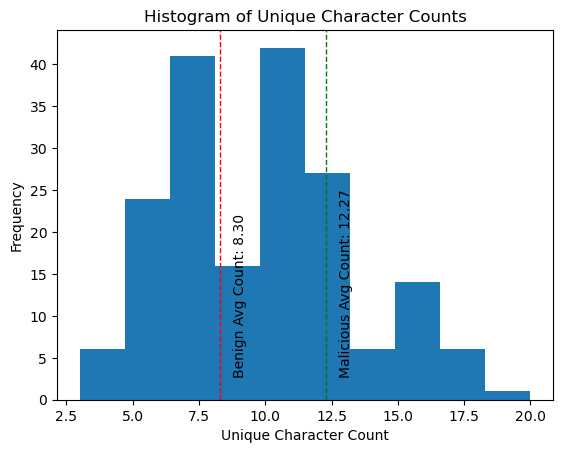

In [30]:
benign_unique_avg = benign_df['Unique Character Count'].mean()
print("Average Benign Unique Character Count: ", benign_unique_avg)

malicious_unique_avg = malicious_df['Unique Character Count'].mean()
print("Average Malicious Unique Character Count: ", malicious_unique_avg)

mixed_unique_character_count = mixed_df['Unique Character Count']
ax = mixed_unique_character_count.plot(kind='hist')
ax.axvline(benign_unique_avg, color='red', linestyle='dashed', linewidth=1)
ax.text(benign_unique_avg + 0.5, 3, 'Benign Avg Count: {:.2f}'.format(benign_unique_avg), rotation=90)
ax.axvline(malicious_unique_avg, color='green', linestyle='dashed', linewidth=1)
ax.text(malicious_unique_avg + 0.5, 3, 'Malicious Avg Count: {:.2f}'.format(malicious_unique_avg), rotation=90)
plt.xlabel('Unique Character Count')
plt.title('Histogram of Unique Character Counts')

plt.show()

Average Benign Tranco Rank:  2728.8178153970175
Average Malicious Tranco Rank:  384932.3903940887


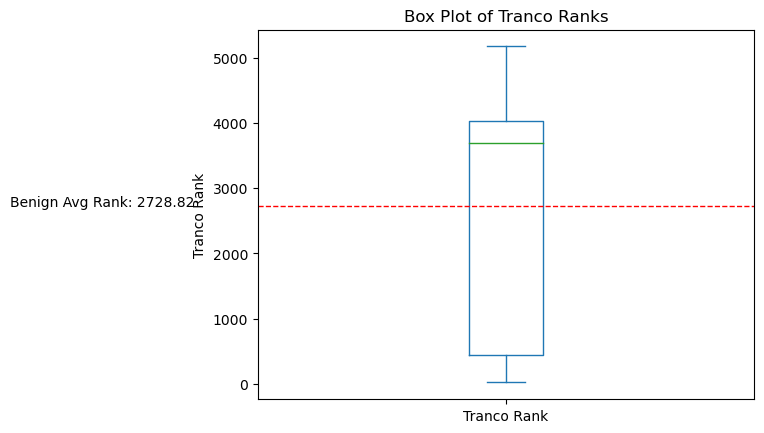

In [28]:
benign_tranco_avg = benign_df['Tranco Rank'].mean()
print("Average Benign Tranco Rank: ", benign_tranco_avg)

malicious_tranco_avg = malicious_df['Tranco Rank'].mean()
print("Average Malicious Tranco Rank: ", malicious_tranco_avg)

mixed_tranco_rank = mixed_df['Tranco Rank'].dropna()
ax = mixed_tranco_rank.plot(kind='box')
ax.axhline(benign_tranco_avg, color='red', linestyle='dashed', linewidth=1)
ax.text(0, benign_tranco_avg + 1, 'Benign Avg Rank: {:.2f}'.format(benign_tranco_avg))
plt.ylabel('Tranco Rank')
plt.title('Box Plot of Tranco Ranks')

plt.show()

Average Benign TLD Rep Score:  0.15041765339073812
Average Malicious Digit Percentage:  0.17310462589259054


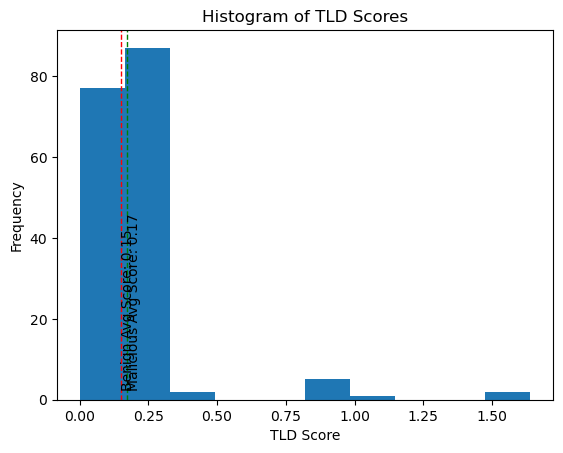

In [34]:
benign_tld_score_avg = benign_df['TLD Reputation Score'].mean()
print("Average Benign TLD Rep Score: ", benign_tld_score_avg)

malicious_tld_score_avg = malicious_df['TLD Reputation Score'].mean()
print("Average Malicious Digit Percentage: ", malicious_tld_score_avg)

mixed_tld_score = mixed_df['TLD Reputation Score']
ax = mixed_tld_score.plot(kind='hist')
ax.axvline(benign_tld_score_avg, color='red', linestyle='dashed', linewidth=1)
ax.text(benign_tld_score_avg, 3, 'Benign Avg Score: {:.2f}'.format(benign_tld_score_avg), rotation=90)
ax.axvline(malicious_tld_score_avg, color='green', linestyle='dashed', linewidth=1)
ax.text(malicious_tld_score_avg, 3, 'Malicious Avg Score: {:.2f}'.format(malicious_tld_score_avg), rotation=90)
plt.xlabel('TLD Score')
plt.title('Histogram of TLD Scores')
plt.show()